In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

df = pd.read_csv("/content/train_star.csv")
df_2=pd.read_csv("/content/test_star.csv")
print(df.shape)
df.isna().any()

(20732, 7)


Vmag           False
Plx            False
e_Plx          False
B-V            False
SpType         False
Amag           False
TargetClass    False
dtype: bool

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20732 entries, 0 to 20731
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         20732 non-null  float64
 1   Plx          20732 non-null  float64
 2   e_Plx        20732 non-null  float64
 3   B-V          20732 non-null  float64
 4   SpType       20732 non-null  object 
 5   Amag         20732 non-null  float64
 6   TargetClass  20732 non-null  object 
 7   O            20732 non-null  int64  
 8   B            20732 non-null  int64  
 9   A            20732 non-null  int64  
 10  F            20732 non-null  int64  
 11  G            20732 non-null  int64  
 12  K            20732 non-null  int64  
 13  M            20732 non-null  int64  
 14  I            20732 non-null  int64  
 15  II           20732 non-null  int64  
 16  III          20732 non-null  int64  
 17  IV           20732 non-null  int64  
 18  V            20732 non-null  int64  
 19  0   

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,O,B,A,F,G,K,M,I,II,III,IV,V,0
0,9.99,7.92,1.61,0.646,G5/G6V,19.483625,Giant,0,0,0,0,1,0,0,0,0,0,0,1,0
1,10.86,3.26,2.12,1.840,M1V:,18.426088,Giant,0,0,0,0,0,0,1,0,0,0,0,1,0
2,8.83,7.57,1.05,0.461,F3V,18.225480,Giant,0,0,0,1,0,0,0,0,0,0,0,1,0
3,7.72,24.80,0.89,0.613,G3IV,19.692257,Giant,0,0,0,0,1,0,0,0,0,0,1,0,0
4,8.81,3.17,1.03,0.872,G6III,16.315296,Dwarf,0,0,0,0,1,0,0,0,0,1,0,0,0


In [3]:
df["O"]=[0]*20732
df["B"]=[0]*20732
df["A"]=[0]*20732
df["F"]=[0]*20732
df["G"]=[0]*20732
df["K"]=[0]*20732
df["M"]=[0]*20732
df["I"]=[0]*20732
df["II"]=[0]*20732
df["III"]=[0]*20732
df["IV"]=[0]*20732
df["V"]=[0]*20732
df["0"]=[0]*20732

In [5]:
#label_encoder = preprocessing.LabelEncoder()
#label_encoder.fit(df['SpType'])
#df['SpType'] = label_encoder.transform(df['SpType'])
#label_encoder.fit(df['TargetClass'])
#df['TargetClass'] = label_encoder.transform(df['TargetClass'])
x=df["SpType"]
T=0
for s in x:

  if 'O' in s:
    df['O'][T]=1
  if 'B' in s:
    df['B'][T]=1
  if 'A' in s:
    df['A'][T]=1
  if 'F' in s:
    df['F'][T]=1
  if 'G' in s:
    df['G'][T]=1
  if 'K' in s:
    df['K'][T]=1
  if 'M' in s:
    df['M'][T]=1
  if '0' in s:
    df['0'][T]=1
  if 'III' in s:
    df['III'][T]=1
  elif 'II' in s:
    df['II'][T]=1
  elif 'IV' in s:
    df['IV'][T]=1
  elif 'V' in s:
    df['V'][T]=1
  elif 'I' in s:
    df['I'][T]=1
  T+=1



Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-5-a100f1ce8817>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['III'][T]=1
<ipython-input-5-a100f1ce8817>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['B'][T]=1
<ipython-input-5-a100f1ce8817>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['II'][T]=1
<ipython-input-5-a100f1ce8817>:21: SettingWithCopyWarning: 
A value is trying to be se

In [7]:
df_2["O"]=0
df_2["B"]=0
df_2["A"]=0
df_2["F"]=0
df_2["G"]=0
df_2["K"]=0
df_2["M"]=0
df_2["I"]=0
df_2["II"]=0
df_2["III"]=0
df_2["IV"]=0
df_2["V"]=0
df_2["0"]=0
x=df_2["SpType"]
T=0
for s in x:

  if 'O' in s:
    df_2['O'][T]=1
  if 'B' in s:
    df_2['B'][T]=1
  if 'A' in s:
    df_2['A'][T]=1
  if 'F' in s:
    df_2['F'][T]=1
  if 'G' in s:
    df_2['G'][T]=1
  if 'K' in s:
    df_2['K'][T]=1
  if 'M' in s:
    df_2['M'][T]=1
  if '0' in s:
    df_2['0'][T]=1
  if 'III' in s:
    df_2['III'][T]=1
  elif 'II' in s:
    df_2['II'][T]=1
  elif 'IV' in s:
    df_2['IV'][T]=1
  elif 'V' in s:
    df_2['V'][T]=1
  elif 'I' in s:
    df_2['I'][T]=1
  T+=1
df_2=df_2.drop(['SpType'],axis=1)

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-7-dba922d23cca>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['0'][T]=1
<ipython-input-7-dba922d23cca>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['III'][T]=1
<ipython-input-7-dba922d23cca>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['B'][T]=1
<ipython-input-7-dba922d23cca>:33: SettingWithCopyWarning: 
A value is trying to 

In [8]:
#df=df.drop(['SpType'],axis=1)
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['TargetClass'])
df['TargetClass'] = label_encoder.transform(df['TargetClass'])

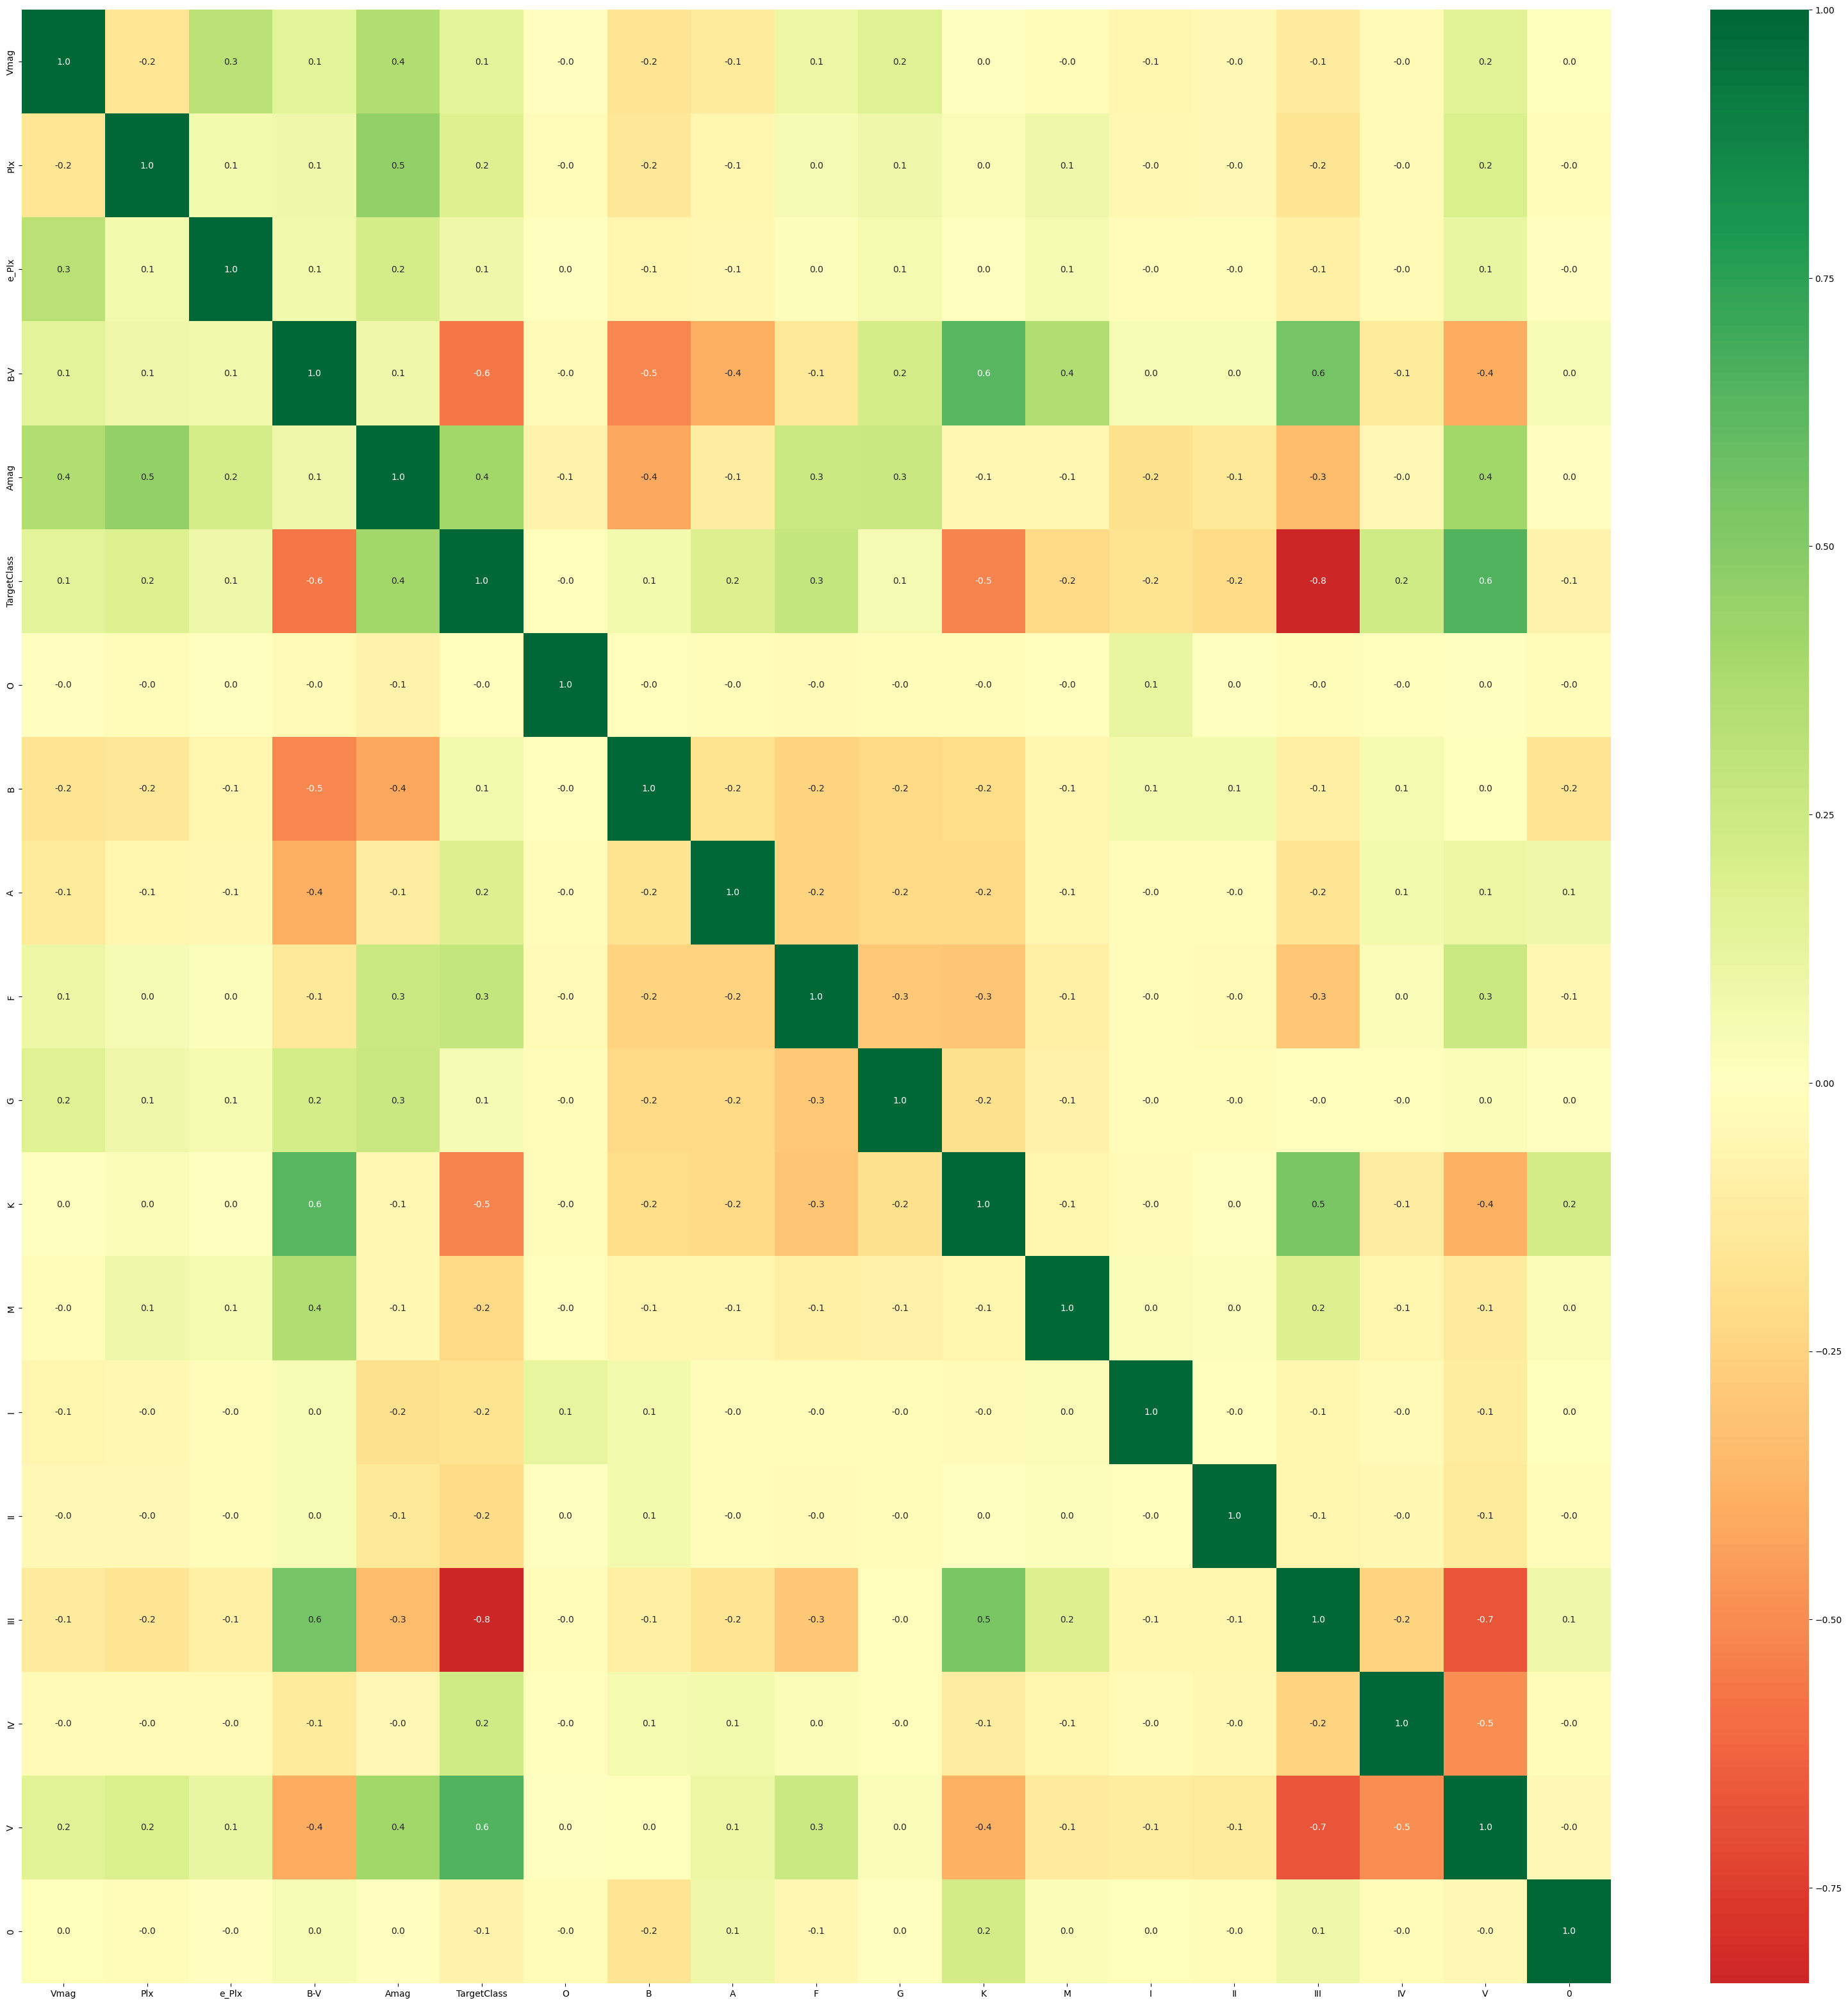

In [ ]:
df_1=df.drop(['SpType'],axis=1)
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df_1['TargetClass'])
df_1['TargetClass'] = label_encoder.transform(df_1['TargetClass'])
mc = df_1.corr()
plt.figure(figsize = (40, 40))
sns.heatmap(mc, cmap='RdYlGn', center=0, annot=True, fmt=".1f")
plt.show()

In [ ]:
df["TargetClass"].unique()

array([1, 0])

итого 2 класса, где 1- гигант, 0- дварф
значений более 20000, чего более чем хватает.

это задача на кластеризацию, значит линейная регрессия не нужна

In [ ]:
df_1=df.drop(["TargetClass"],axis=1)

In [ ]:
n=2

kmeans = KMeans(n_clusters=2)

kmeans.fit(df_1)

Y_pred = kmeans.labels_
Y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
df_1['cluster1'] = Y_pred
df_1

,Vmag,Plx,e_Plx,B-V,SpType,Amag,cluster1
0,9.99,7.92,1.61,0.646,1110,19.483625,1
1,10.86,3.26,2.12,1.840,1576,18.426088,1
2,8.83,7.57,1.05,0.461,836,18.225480,1
3,7.72,24.80,0.89,0.613,1086,19.692257,1
4,8.81,3.17,1.03,0.872,1175,16.315296,1
...,...,...,...,...,...,...,...
20727,7.07,14.88,0.90,0.586,988,17.933014,1
20728,9.11,4.71,0.87,0.485,885,17.475105,1
20729,9.69,1.61,1.56,0.384,77,15.724129,0
20730,8.06,37.33,0.97,0.758,1395,20.920290,1


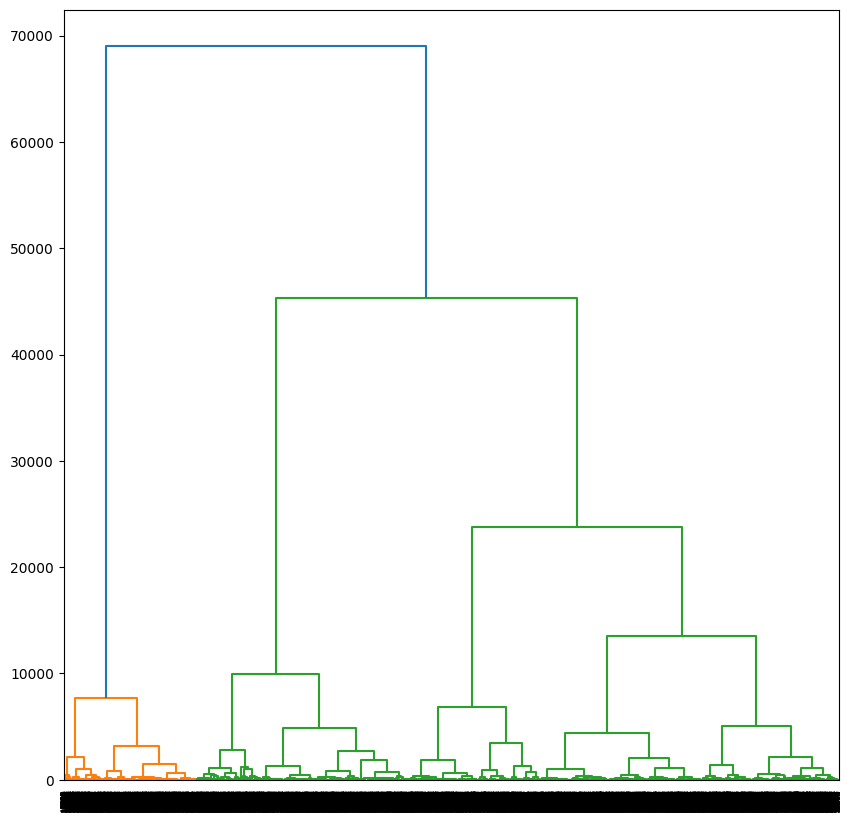

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = df.drop(["TargetClass"],axis=1)
# матрица расстояний
Z = linkage(X, 'ward')

# визуализация дендрограмы
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

In [ ]:
from scipy.cluster.hierarchy import fcluster


#y_pred = fcluster(Z, 1, criterion='distance')
y_pred = fcluster(Z, 2, criterion='maxclust')

np.unique(y_pred)
df_1['cluster2'] = y_pred
df_1["cluster2"].unique()

array([2, 1], dtype=int32)

In [ ]:
df_1['cluster1'].value_counts()

cluster1
1    13677
0     7055
Name: count, dtype: int64

In [ ]:

df_1['cluster2'].value_counts()

cluster2
2    17190
1     3542
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

# Выделим вектор признаков Х и вектор ответов y
X = df.drop(['TargetClass','SpType'], axis=1)
y = df['TargetClass']

# train - на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
# model = KMeans()
# model = LinearRegression()

# модель учится, для этого ей нужны правильные
model.fit(X_train, y_train)

# тестируем, для признаков у которых нет ответов, мы предсказывает ответ
df['reg'] = model.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df['TargetClass']

0        1
1        1
2        1
3        1
4        0
        ..
20727    1
20728    1
20729    1
20730    1
20731    1
Name: TargetClass, Length: 20732, dtype: int64

In [10]:
df['reg']

0        1
1        1
2        1
3        1
4        0
        ..
20727    1
20728    1
20729    1
20730    1
20731    0
Name: reg, Length: 20732, dtype: int64

In [ ]:
df_1['cluster1']

0        1
1        1
2        1
3        1
4        1
        ..
20727    1
20728    1
20729    0
20730    1
20731    1
Name: cluster1, Length: 20732, dtype: int32

In [ ]:

df_1['cluster2']

0        2
1        2
2        2
3        2
4        2
        ..
20727    2
20728    2
20729    1
20730    2
20731    2
Name: cluster2, Length: 20732, dtype: int32

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
tn, fp, fn, tp = confusion_matrix(df['reg'], df['TargetClass']).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
precision_score(df['reg'], df['TargetClass'])

TN: 3821
FP: 825
FN: 1118
TP: 14968


0.9477616665611347

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
tn, fp, fn, tp = confusion_matrix(df_1['cluster1'], df['TargetClass']).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
precision_score(df_1['cluster1'], df['TargetClass'])

TN: 739
FP: 6316
FN: 4200
TP: 9477


0.6000759830304565

In [ ]:
model.predict(df_2)

array([1, 0, 0, ..., 1, 1, 0])

In [11]:
df_2["answer"]=model.predict(df_2)
#label_encoder = preprocessing.LabelEncoder()
#label_encoder.fit(df_2['answer'])
#df_2['answer'] = label_encoder.transform(df_2['answer'])
#x=[]
#for i in df_2['answer']:
#    if i==0:
#      x.append("Giant")
#    else:
#      x.append("Dwarf")
#test_pred = x

my_submition = pd.DataFrame(df_2["answer"].values, columns=['TargetClass'])
#my_submition=my_submition.reset_index()
my_submition.reset_index().to_csv('mysubmition.csv', index=False)

In [12]:
my_submition

,TargetClass
0,0
1,0
2,0
3,0
4,0
...,...
18815,0
18816,0
18817,0
18818,1
